# Lung Cancer Survival Prediction

### Brandon May

__Problem Background:__

Lung cancer is a particularly devastating type of cancer killing over 100,000 people per year in the U.S.  Even with proper recognition and treatment, many times the cancer can be too advanced to successfully cure and threaet.  For early stage cancers, the best predictors for survival are functional status as well as pulmonary function tests to determine lung cancer.  Treatment does vary based on the tumor type as well as how far it has spread.  Machine learning and data science analytics have the potential to have significant benefits in healthcare and medicine as an adjunct to clinician judgment.  Can machine learning help predict survival one year after lung surgery to treat a cancer?

__Dataset Description:__

The dataset was obtained from the UCI Machine Learning Repository and was of 470 patients between 2007-2011 in Poland who had various risk factors and different stages of lung cancers.  The variables included lung function tests, vascular risk indicators (i.e. blood pressure, smoking), performance status, and tumor stage.  The target variable is survival at 1 year.

[https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data](https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data)

__Reference Cited:__

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

# Data Cleaning, Exploration, and Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('ThoracicSurgery.csv')
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


#### Description of Variables

1.	DGN: Diagnosis (based on ICD codes)
2.	PRE4: Forced Vital Capacity -FVC
3.	PRE5: Volume of Air Exhaled in 1 Second - FEV1
4.	PRE6: Performance Status (Zubrod Scale) – 3 Values (PRZ0, PRZ1, PRZ2)
5.	PRE7: Pain Before Surgery (T/F)
6.	PRE8: Hemoptysis Before Surgery (T/F)
7.	PRE9: Dyspnea Before Surgery (T/F)
8.	PRE10: Cough Before Surgery (T/F)
9.	PRE11: Weakness Before Surgery (T/F)
10.	PRE14: T in Cancer Stage – Smallest to Largest (OC11, OC12, OC13, OC14)
11.	PRE17: Type 2 Diabetes – (T/F)
12.	PRE19: MI w/in 6 Months – (T/F)
13.	PRE25: Peripheral Arterial Disease – (T/F)
14.	PRE30: Smoking – (T/F)
15.	PRE32: Asthma – (T/F)
16.	AGE: Age at Time of Surgery
17.	Risk1Y: Survival After 1 Year (T if Died)


Next step is renaming the columns as well as checking the data types to ensure encoded correctly.

In [14]:
#Dropping ID Column as well as Diagnosis ICD Codes
df = df.drop(columns=['id', 'DGN'])

#Renaming Columns
df = df.rename(columns={'DGN': 'Diag', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Perf_Status', 'PRE7': 'Pain', 'PRE8': 'Hemoptysis', 'PRE9': 'Dyspnea', 'PRE10': 'Cough', 'PRE11': 'Weakness', 'PRE14': 'T_Stage', 'PRE17': 'Diabetes', 'PRE19': 'MI', 'PRE25': 'PAD', 'PRE30': 'Smoking', 'PRE32': 'Asthma', 'AGE': 'Age', 'Risk1Yr': 'Died'})

#Viewing Dataframe
df.head()

,FVC,FEV1,Perf_Status,Pain,Hemoptysis,Dyspnea,Cough,Weakness,T_Stage,Diabetes,MI,PAD,Smoking,Asthma,Age,Died
0,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


Note that the Risk1Year category was True if the person died so I have renamed the column to Died to make sure the data was accurate.

Checking data types to ensure that categorical variables are encoded correctly.

In [15]:
df.dtypes

FVC            float64
FEV1           float64
Perf_Status     object
Pain            object
Hemoptysis      object
Dyspnea         object
Cough           object
Weakness        object
T_Stage         object
Diabetes        object
MI              object
PAD             object
Smoking         object
Asthma          object
Age              int64
Died            object
dtype: object

In [16]:
#Recoding the Categorical Variables

df[['Perf_Status', 'Pain', 'Hemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'T_Stage', 'Diabetes', 'MI', 'PAD', 'Smoking', 'Asthma', 'Died']] = df[['Perf_Status', 'Pain', 'Hemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'T_Stage', 'Diabetes', 'MI', 'PAD', 'Smoking', 'Asthma', 'Died']].astype('category')
df.dtypes

FVC             float64
FEV1            float64
Perf_Status    category
Pain           category
Hemoptysis     category
Dyspnea        category
Cough          category
Weakness       category
T_Stage        category
Diabetes       category
MI             category
PAD            category
Smoking        category
Asthma         category
Age               int64
Died           category
dtype: object

In [17]:
#Changing Target Variable to 0 and 1 and Creating New Target Column and Dropping Old Column

df.loc[df['Died'] == 'T', 'Target'] = 1
df.loc[df['Died'] == 'F', 'Target'] = 0

df = df.drop(columns = ['Died'])
df[['Target']] = df[['Target']].astype('category')

In [20]:
df

,FVC,FEV1,Perf_Status,Pain,Hemoptysis,Dyspnea,Cough,Weakness,T_Stage,Diabetes,MI,PAD,Smoking,Asthma,Age,Target
0,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,0.0
1,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,0.0
2,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,0.0
3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,0.0
4,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,0.0
466,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,0.0
467,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,0.0
468,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,0.0


Checking for null values.

In [21]:
df.isnull().values.any()

False

There are no null values in the dataset.

### Descriptive Analysis of Numeric and Categorical Data

In [22]:
print('Description of Numerical Categories')
df.describe()

Description of Numerical Categories


,FVC,FEV1,Age
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


The mean age of the participants in the study population ranged from 21 years old (very young) to 87 years old.  The mean age was 62.  FEV1 mean value was 4.56 and FVC mean value was 3.28.  Looking at the max value for FEV1 of 86, that is extraordinarily high and may be an error.  When visualizing our box plots, will look for this datapoint to see if this is a mistake.

In [23]:
print('Description of Categorical Variables')
df.describe(include=['category'])

Description of Categorical Variables


,Perf_Status,Pain,Hemoptysis,Dyspnea,Cough,Weakness,T_Stage,Diabetes,MI,PAD,Smoking,Asthma,Target
count,470,470,470,470,470,470,470,470,470,470,470,470,470.0
unique,3,2,2,2,2,2,4,2,2,2,2,2,2.0
top,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,0.0
freq,313,439,402,439,323,392,257,435,468,462,386,468,400.0


Died is the target variable and it appears that a large number of participants survived in this population, 400 out of 470 total.  The majority of the participants did not have pain, hemoptysis, dyspnea, or weakness.  Further, the majority did not have diabetes, a heart attack, peripheral arterial disease, or asthma.  The majority of the participants did have cough.  The most common performance status was Zubrod Scale 1 with 0 being asymptomatic to 2 being more symptomatic.

The majority of the participants were smokers which is logical in that those who smoke are likely to get lung cancer.  Further, when looking at the T_stage of the cancer, the most common value was a T of 2.

The distribution of these is interesting in that these appear to be relatively low risk lung cancer patients in that they do not have a lot of other co-morbidities, a poor functional status, etc.  This could explain why so many participants survived.

In [24]:
#Searching for High Correlations

corr_matrix = df.corr()
corr_matrix

,FVC,FEV1,Age
FVC,1.000000,0.032975,-0.290178
FEV1,0.032975,1.000000,-0.115900
Age,-0.290178,-0.115900,1.000000


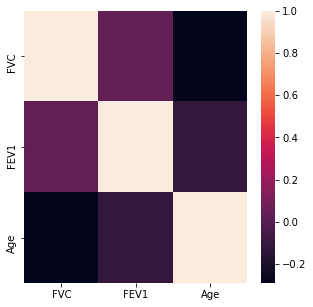

In [25]:
#Displaying Heat Map
plt.rcParams['figure.figsize'] = (5,5)

#Importing Packages
import seaborn as sns

sns.heatmap(corr_matrix)
plt.show()

There do not appear to be any highly correlated values with an absolute correlation value of >0.95.

<Figure size 2160x2160 with 0 Axes>

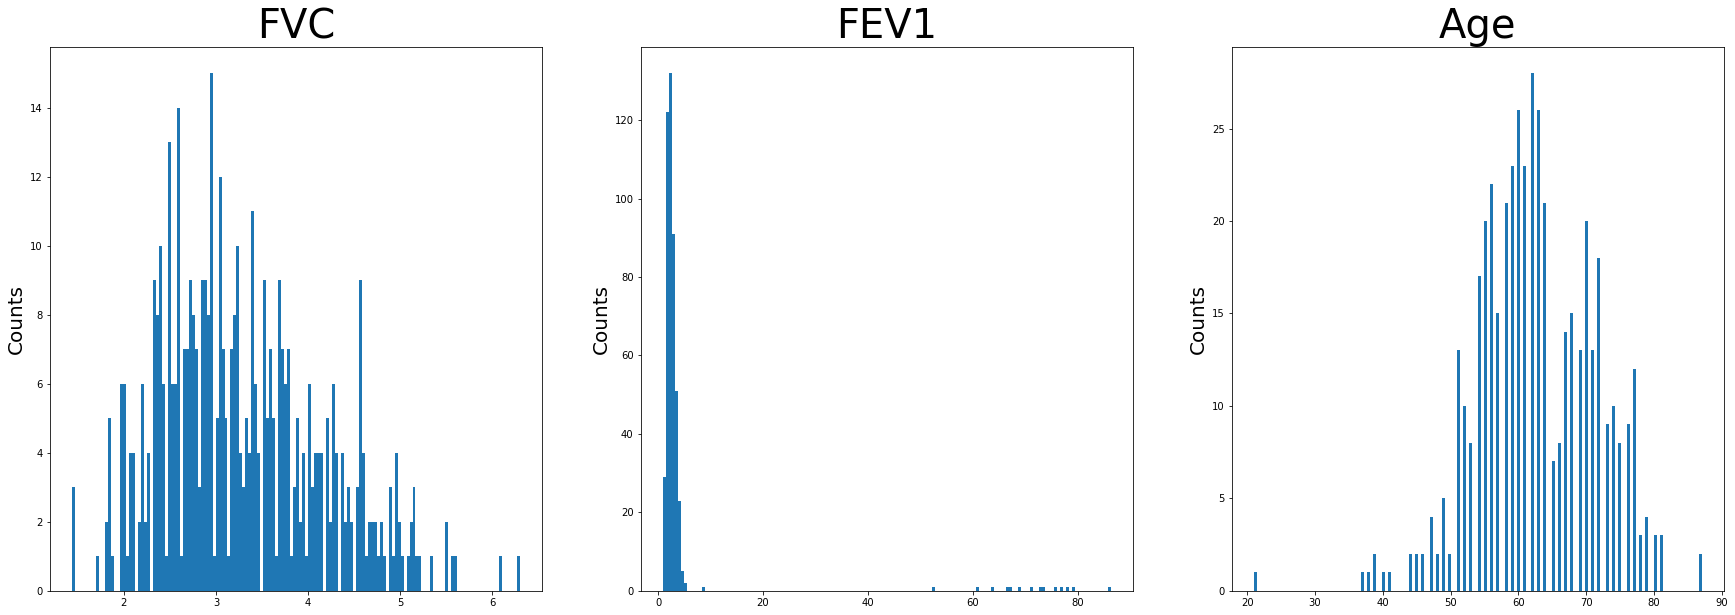

In [26]:
#Visualizing Numerical Data
df_num = df.drop(columns=['Perf_Status', 'Pain', 'Hemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'T_Stage', 'Diabetes', 'MI', 'PAD', 'Smoking', 'Asthma', 'Target'])


#Setting Figure Size
plt.figure(figsize=[30,30])

f,a = plt.subplots(1,3, figsize=(30,10))

a = a.ravel()
for idx, ax in enumerate(a):
    ax.hist(df_num.iloc[:,idx], bins = 150)
    ax.set_title(df_num.columns[idx], size = 40)
    ax.set_ylabel('Counts', size = 20)
plt.show()

Age appears to be approximately normally distributed.  FEV1 has negative skew as well as FVC.  There are notes of high values of FEV1 as well noted on this.

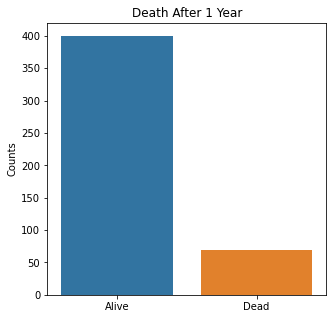

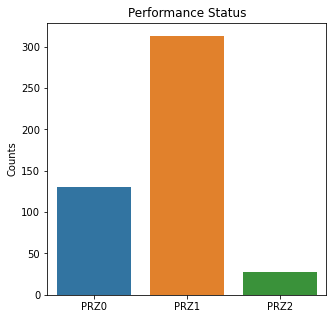

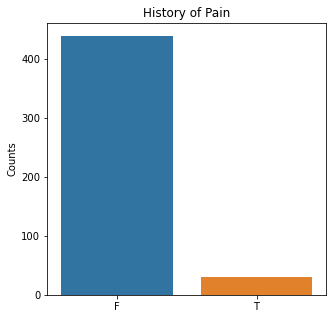

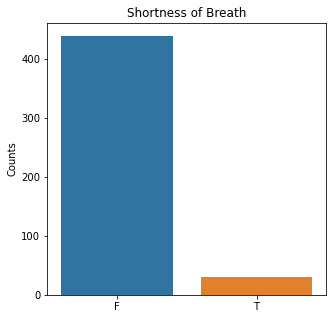

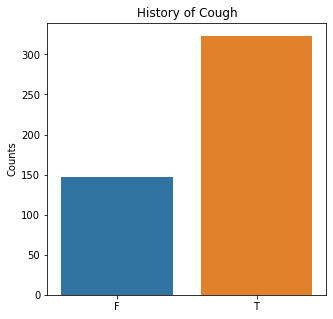

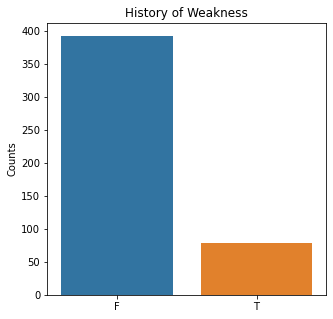

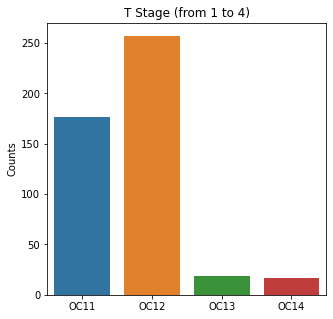

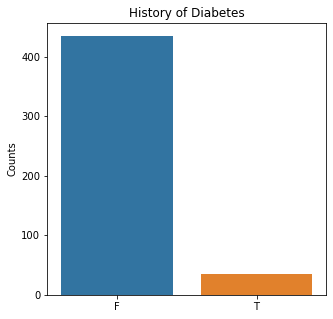

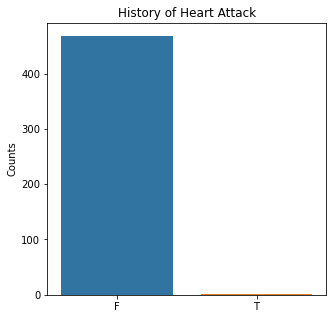

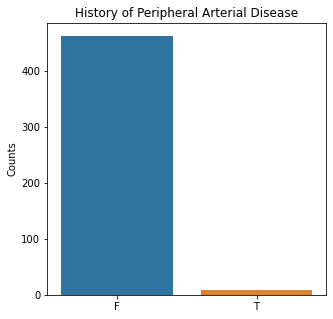

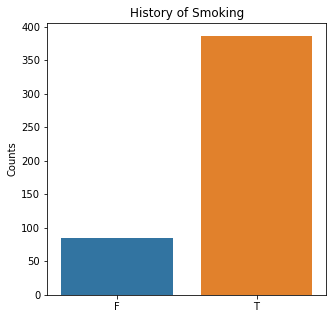

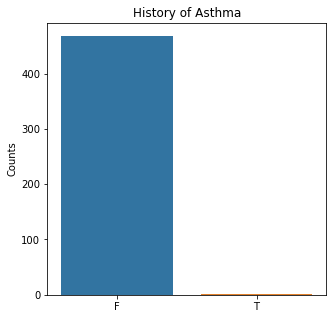

In [27]:
#Visualizing Categorical Data

['Perf_Status', 'Pain', 'Hemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'T_Stage', 'Diabetes', 'MI', 'PAD', 'Smoking', 'Asthma', 'Died']

sns.countplot(x = 'Target', data = df)
plt.title('Death After 1 Year')
plt.xlabel(xlabel = None)
plt.xticks([0,1], ['Alive', 'Dead'])
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Perf_Status', data = df)
plt.title('Performance Status')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Pain', data = df)
plt.title('History of Pain')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Dyspnea', data = df)
plt.title('Shortness of Breath')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Cough', data = df)
plt.title('History of Cough')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Weakness', data = df)
plt.title('History of Weakness')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'T_Stage', data = df)
plt.title('T Stage (from 1 to 4)')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Diabetes', data = df)
plt.title('History of Diabetes')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'MI', data = df)
plt.title('History of Heart Attack')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'PAD', data = df)
plt.title('History of Peripheral Arterial Disease')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Smoking', data = df)
plt.title('History of Smoking')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = 'Asthma', data = df)
plt.title('History of Asthma')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

The graphs here confirm what was seen in the descriptive analysis.  The majority of participants survived.  Most participants did have cough and history of smoking.  The most common functional status was Zubrod 1 which is between being completely asymptomatic and having about 50% of the day impacted by symptoms.

Very few patients in this study had a history of asthma, diabetes, peripheral arterial disease, or heart attack.

Further, when looking at the distribution for the T staging, most people had T1 or 2 tumors.  This is a small and earlier stage tumor.  Few patients had T3 or T4.  These are more advanced tumors and would have a worse prognosis.

Given these demographics, it bears mentioning that the study population in this dataset have relatively healthy cancer patients without significant co-morbidities.  With significant co-morbidities, survival would be expected to be worse for treatment for cancer.

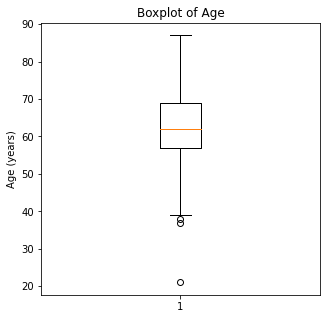

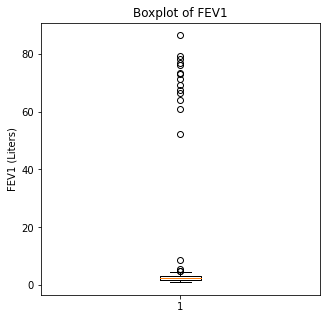

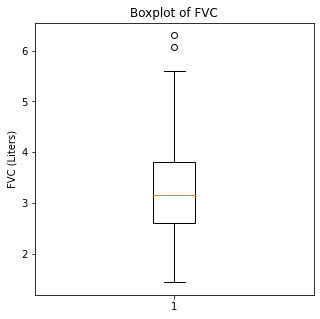

In [28]:
#Visualizing Boxplots to Assess for Outliers

plt.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age (years)')
plt.show()

plt.boxplot(df['FEV1'])
plt.title('Boxplot of FEV1')
plt.ylabel('FEV1 (Liters)')
plt.show()

plt.boxplot(df['FVC'])
plt.title('Boxplot of FVC')
plt.ylabel('FVC (Liters)')
plt.show()

When looking at the numerical variables, there are outliers in the FEV1 values and a couple of outliers in the FVC in liters.  The age variable has less though there were some younger patients that would be unexpected in a population of people who had lung cancer as this is generally a disease of an older population.

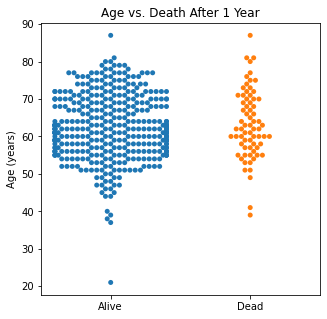

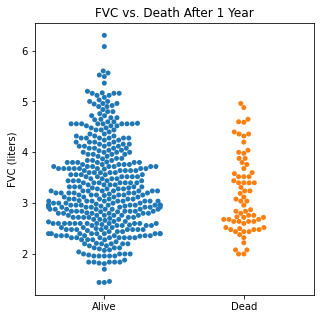

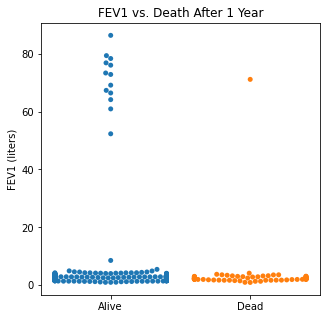

In [29]:
#Visualizing Swarm Plots to Compare Target Variable to Our Numeric Explanatory Variables

categories = df.Target

sns.swarmplot(categories, df.Age)
plt.title('Age vs. Death After 1 Year')
plt.xlabel(xlabel = None)
plt.xticks([0,1], ['Alive', 'Dead'])
plt.ylabel('Age (years)')
plt.show()

sns.swarmplot(categories, df.FVC)
plt.title('FVC vs. Death After 1 Year')
plt.xlabel(xlabel = None)
plt.xticks([0,1], ['Alive', 'Dead'])
plt.ylabel('FVC (liters)')
plt.show()

sns.swarmplot(categories, df.FEV1)
plt.title('FEV1 vs. Death After 1 Year')
plt.xlabel(xlabel = None)
plt.xticks([0,1], ['Alive', 'Dead'])
plt.ylabel('FEV1 (liters)')
plt.show()

There does not appear to be too much of a difference between age distributions, FEV1, and FVC compared to survival.

## Machine Learning Algorithms

Initially, I ran teh machine learning algorithms with the outliers (which are likely errors) included and then will compare by doing the same algorithms without the outliers to see if this makes a difference.

### K Means Clustering

In [134]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df.loc[:, df.columns != 'Target']
features = pd.get_dummies(features)
standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

x = np.array(features_standardized)
y = np.array(df['Target'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [137]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print('K Means Clustering Algorithm Accuracy:', correct/len(x))

K Means Clustering Algorithm Accuracy: 0.6042553191489362


Using K Means learning, dropping the target column and then comparing the clustering algorithm with the true results, there was an accuracy of 60.4%.

### Logistic Regression

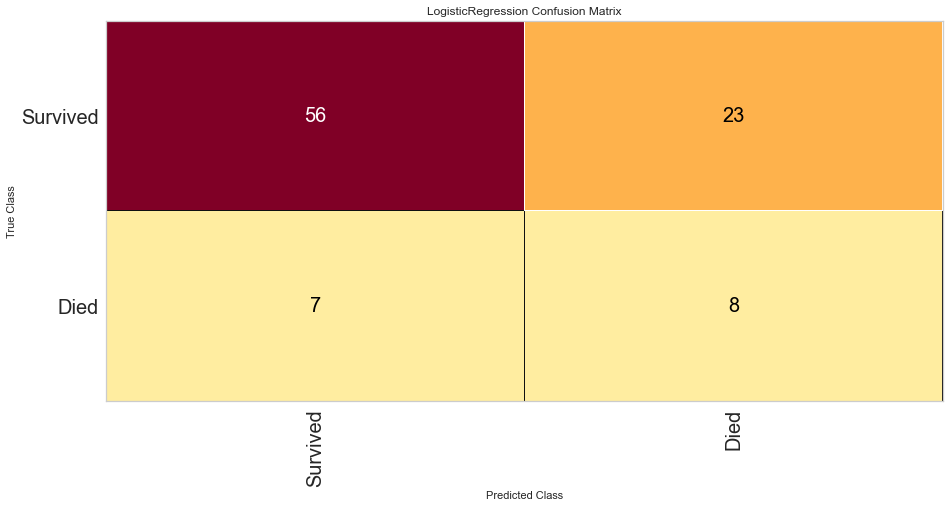

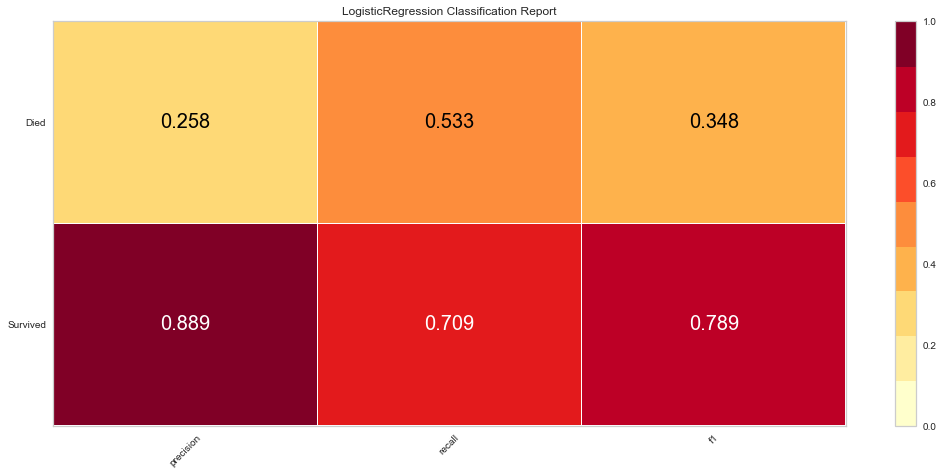

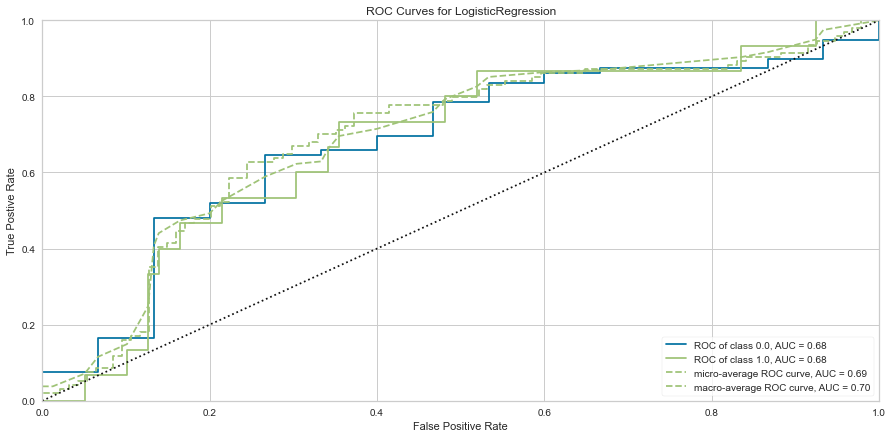

In [97]:
#Importing Packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC

#Creating Features and Target Objects
features = df.loc[:, df.columns != 'Target']
target = df['Target']

#Getting Dummies for Our Categoricals
features = pd.get_dummies(features)

#Creating Standardizer and Logit Objects
standardizer = StandardScaler()
logit = LogisticRegression(class_weight = 'balanced')

#Standardizing Features
features_standardized = standardizer.fit_transform(features)

#Train/Test Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2)

#Fitting Data to Logistic Regression Classifier
logreg = logit.fit(features_train, target_train)

#Confusion Matrix Visualizer
classes = ['Survived', 'Died']
cm = ConfusionMatrix(logit, classes = classes, percent = False)

#Fitting Passed Model
cm.fit(features_train, target_train)
cm.score(features_test, target_test)

#Changing Fontsize in Figure
for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

#Configuring Graph Parameters
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(logit, classes = classes)
visualizer.fit(features_train, target_train)
visualizer.score(features_test, target_test)
g = visualizer.poof()

#ROC/AUC Curve

roc = ROCAUC(logit)
roc.fit(features_train, target_train)
roc.score(features_test, target_test)
g = roc.poof()

Logistic regression had a high F1 score of 0.789 for predicting survival.  It had a comparatively low score of 0.348 when predicting death.  ROC was 0.68 for both classes.  There were 7 false negatives predicted in that the model predicted survival when the person actually died.

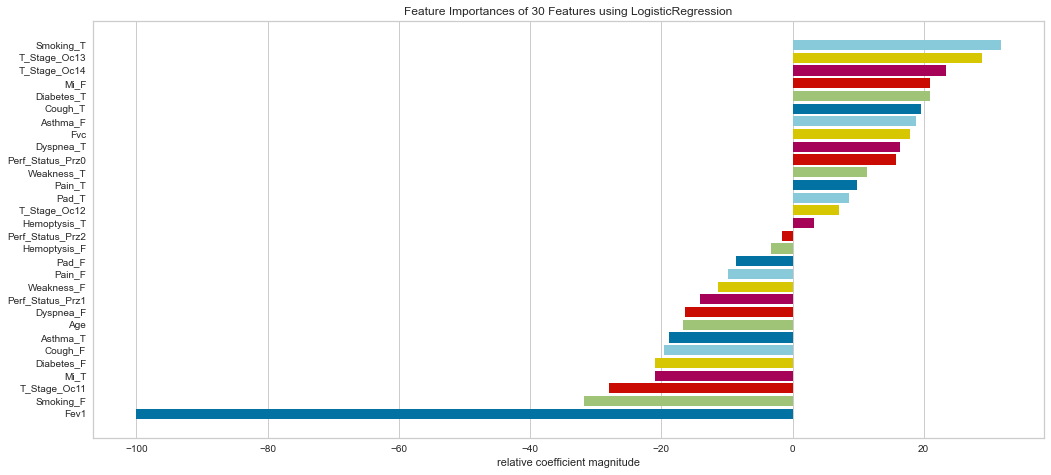

In [138]:
#Checking Variable Feature Importance

from yellowbrick.model_selection import FeatureImportances

#Getting Labels and Checking Feature Importance for Log Reg Model
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(logreg, labels = labels)
viz.fit(features_train, features_test)
viz.show()

Ranking the feature importance was very interesting in that it relatively weighted smokers, T3/4 tumors (higher stage), gender, diabetes, cough, and shortness of breath relatively highly.  Interestingly enough, the FEV1 status was considered the least important by relative coefficients.

### Support Vector Machine Classifier

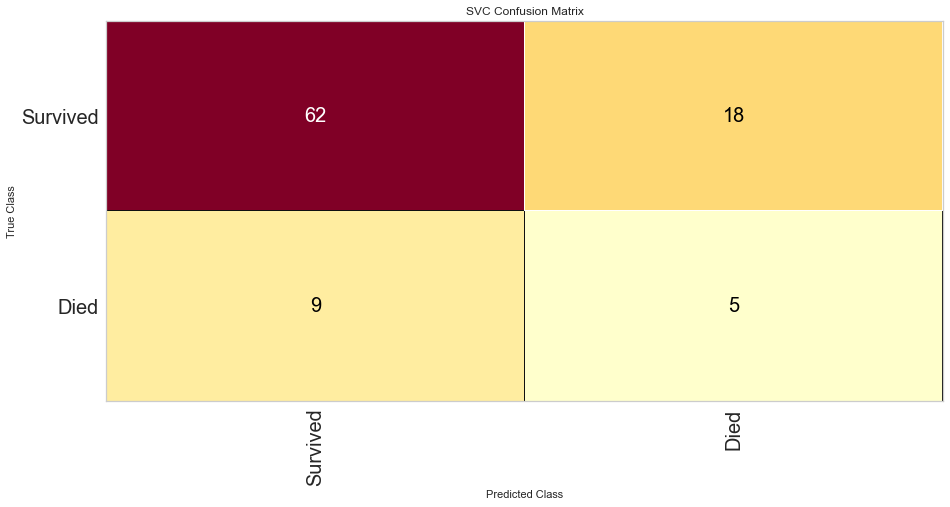

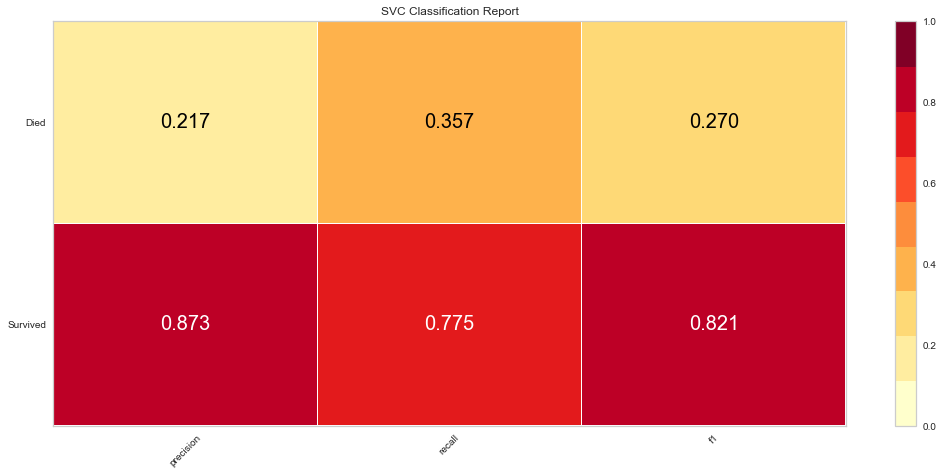

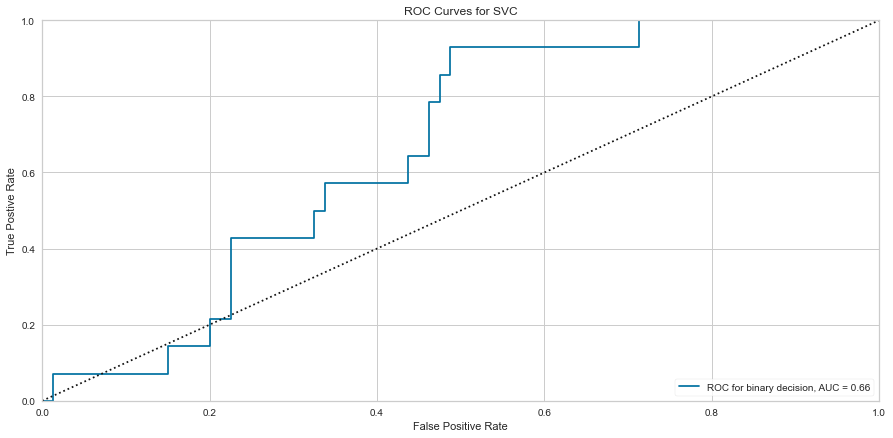

In [139]:
#Importing Packages
from sklearn.svm import SVC

#Resetting our Target Object to Not Have Dummy Variables
target = df['Target']

#Creating SVM Object
svc = SVC(kernel='linear', class_weight = 'balanced')

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 1)

svc.fit(features_train, target_train)

cm_svc = ConfusionMatrix(svc, classes = classes, percent = False)
cm_svc.fit(features_train, target_train)
cm_svc.score(features_test, target_test)
cm_svc.poof()

svc_vis = ClassificationReport(svc, classes = classes)
svc_vis.fit(features_train, target_train)
svc_vis.score(features_test, target_test)
svc_vis.poof()

svc_roc = ROCAUC(svc, micro = False, macro = False, per_class = False)
svc_roc.fit(features_train, target_train)
svc_roc.score(features_test, target_test)
svc_roc.poof()

The SVC model performed similarly to the logistic regression model.  However, there were 9 false negatives, which was higher than the logistic regression model.  The F1 score for predicting survival was higher at 0.821 but the prediction of death was lower at 0.270.  The ROC was also lower at 0.66.

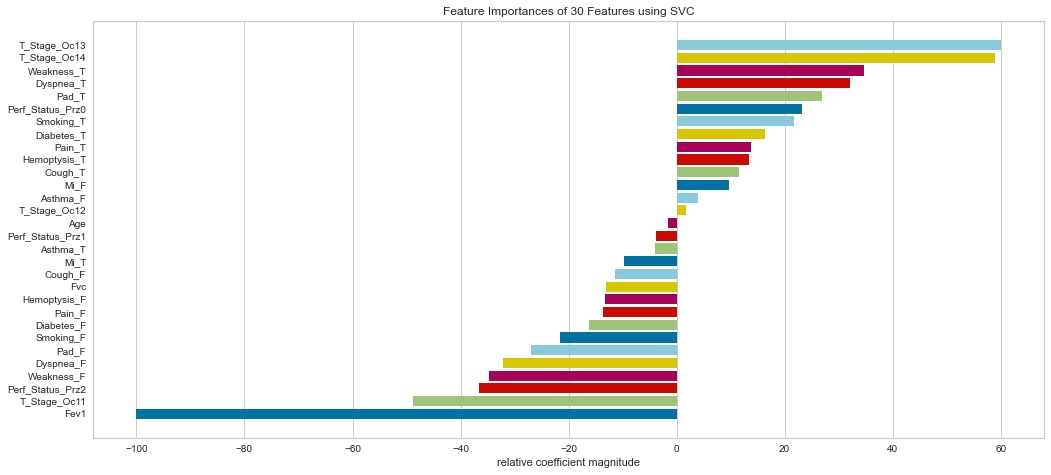

In [140]:
#Checking Feature Importance
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(svc, labels = labels)
viz.fit(features_train, features_test)
viz.show()

The SVC model agreed with the logistic regression model in that the T3/4 higher stage tumors were relatively more important.  It also noted shortness of breath, weakness, and smoking as highly important.  The FEV1 was considered the least important measure.

### KNN

In [81]:
#Importing Packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Getting Dummies for Target Variable
features = pd.get_dummies(features)
target = pd.get_dummies(df['Target'])

#Standardizing Features

standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 1)

#Starting with KNN of 3
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
knn.fit(features_train, target_train)

#Visualizing Metrics
target_pred = knn.predict(features_test)
test = np.array(target_test).argmax(axis=1)
predictions = np.array(target_pred).argmax(axis=1)
print('Confusion Matrix:\n', confusion_matrix(test, predictions), '\n')
print('Classification Report:\n', classification_report(test, predictions), '\n')

Confusion Matrix:
 [[76  4]
 [13  1]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        80
           1       0.20      0.07      0.11        14

    accuracy                           0.82        94
   macro avg       0.53      0.51      0.50        94
weighted avg       0.76      0.82      0.78        94
 



In [91]:
#Hyperparameter Tuning for KNN Using GridSearch CV

param_dist = {"leaf_size": list(range(1,50)),
             "n_neighbors": list(range(1,30)),
             "p": [1,2]}

#Using GridSearch Object
clf = GridSearchCV(knn, param_dist, cv=10, n_jobs = -1)
best_model = clf.fit(features_standardized, target)

print('Best Leaf Size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Metric:', best_model.best_estimator_.get_params()['metric'])
print('Best Weights:', best_model.best_estimator_.get_params()['weights'])

Best Leaf Size: 1
Best p: 1
Best n_neighbors: 11
Best Metric: minkowski
Best Weights: uniform


In [92]:
#Running New Tuned Model and Evaluating Metrics
knn_best = KNeighborsClassifier(n_neighbors = 11, p = 1, leaf_size = 1, metric = "minkowski", weights= "uniform", n_jobs = -1)
knn_best.fit(features_train, target_train)
target_pred = knn_best.predict(features_test)
test = np.array(target_test).argmax(axis=1)
predictions = np.array(target_pred).argmax(axis=1)
print("Confusion Matrix:\n", confusion_matrix(test, predictions),'\n')
print("Classification Report:\n", classification_report(test, predictions))


Confusion Matrix:
 [[75  0]
 [17  0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        75
           1       0.00      0.00      0.00        17

    accuracy                           0.82        92
   macro avg       0.41      0.50      0.45        92
weighted avg       0.66      0.82      0.73        92



The KNN model had a high F1 score at predicting survival at 0.90.  However, even with the tuned hyperparameters, it had a 0 score for F1 for predicting death.  This would be the worst performing model since the point of the model would be to predict risk of death, not risk of survival.

### XG Boost

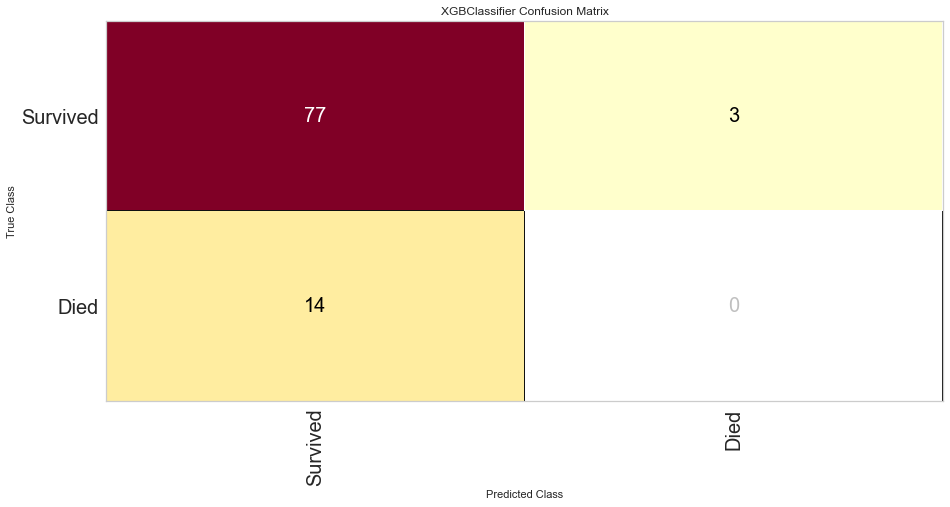

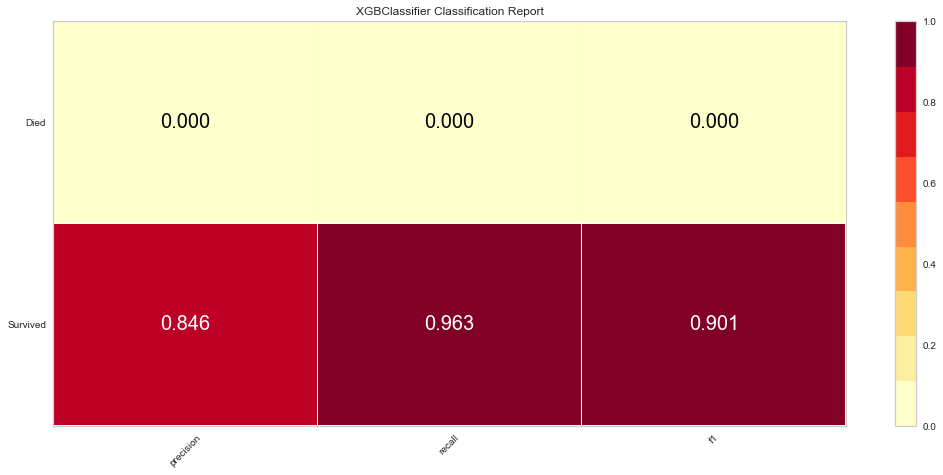

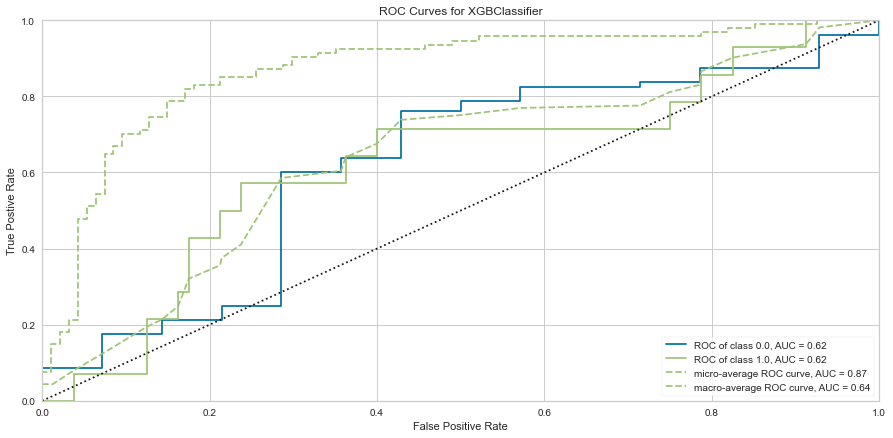

In [102]:
#Importing Packages
from xgboost import XGBClassifier

features = pd.get_dummies(features)
target = df['Target']

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 1)

xgb = XGBClassifier(random_state = 1)
xgb.fit(features_train, target_train)

#Visualizing Confusion Matrix, Class Report, and ROC Curve
xgb_cm = ConfusionMatrix(xgb, classes = classes, percent = False)
xgb_cm.fit(features_train, target_train)
xgb_cm.score(features_test, target_test)
xgb_cm.poof()

xgb_class = ClassificationReport(xgb, classes = classes)
xgb_class.fit(features_train, target_train)
xgb_class.score(features_test, target_test)
xgb_class.poof()

xgb_roc = ROCAUC(xgb)
xgb_roc.fit(features_train, target_train)
xgb_roc.score(features_test, target_test)
xgb_roc.poof()

The XG Boost model had a high F1 score at 0.90 for predicting survival with a 0 score for F1.  ROC was 0.62.  This performed similarly to the KNN model.

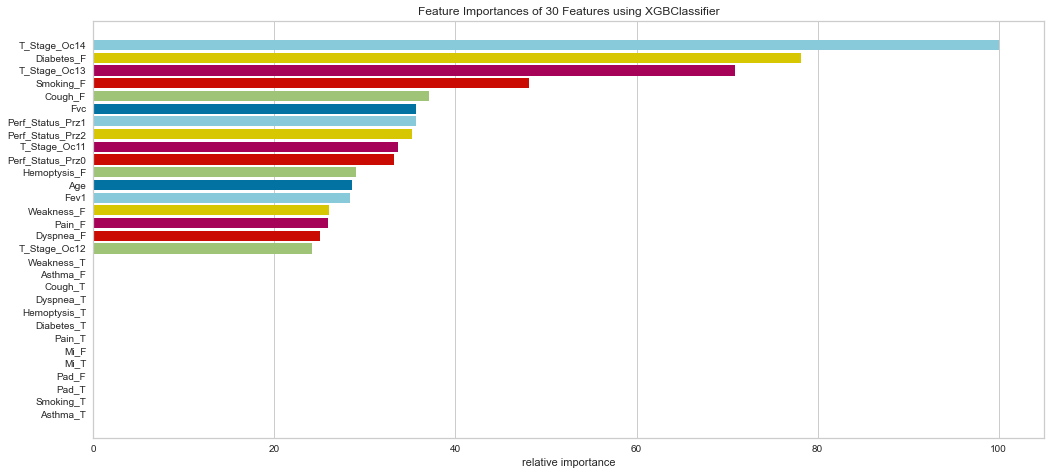

In [103]:
#Checking Feature Importance
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(xgb, labels = labels)
viz.fit(features_train, features_test)
viz.show()

Similarly, the XG Boost model weighted T Stage 3/4, absence of diabetes, absence of smoking, and absence of cough highly.

## Machine Learning After Removing Outliers

I eliminated the data points with the FEV1's that had numbers that were exceedingly high to see if this would improve the machine learning algorithm accuracy.

In [85]:
df1 = pd.read_csv('ThoracicSurgery - Outliers Removed.csv')
df1.head()

,FVC,FEV1,Perf_Status,Pain,Hemoptysis,Dyspnea,Cough,Weakness,T_Stage,Diabetes,MI,PAD,Smoking,Asthma,Age,Target
0,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,0.0
1,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,0.0
2,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,0.0
3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,0.0
4,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,1.0


In [86]:
#Dropping ID Column as well as Diagnosis ICD Codes
df1 = df1.drop(columns=['id', 'DGN'])

#Renaming Columns
df1 = df1.rename(columns={'DGN': 'Diag', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Perf_Status', 'PRE7': 'Pain', 'PRE8': 'Hemoptysis', 'PRE9': 'Dyspnea', 'PRE10': 'Cough', 'PRE11': 'Weakness', 'PRE14': 'T_Stage', 'PRE17': 'Diabetes', 'PRE19': 'MI', 'PRE25': 'PAD', 'PRE30': 'Smoking', 'PRE32': 'Asthma', 'AGE': 'Age', 'Risk1Yr': 'Died'})

df1[['Perf_Status', 'Pain', 'Hemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'T_Stage', 'Diabetes', 'MI', 'PAD', 'Smoking', 'Asthma', 'Died']] = df1[['Perf_Status', 'Pain', 'Hemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'T_Stage', 'Diabetes', 'MI', 'PAD', 'Smoking', 'Asthma', 'Died']].astype('category')
df1.dtypes

FVC             float64
FEV1            float64
Perf_Status    category
Pain           category
Hemoptysis     category
Dyspnea        category
Cough          category
Weakness       category
T_Stage        category
Diabetes       category
MI             category
PAD            category
Smoking        category
Asthma         category
Age               int64
Died           category
dtype: object

In [87]:
#Changing Target Variable to 0 and 1 and Creating New Target Column and Dropping Old Column

df1.loc[df1['Died'] == 'T', 'Target'] = 1
df1.loc[df1['Died'] == 'F', 'Target'] = 0

df1 = df1.drop(columns = ['Died'])

### K Means Clustering

In [141]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df1.loc[:, df1.columns != 'Target']
features = pd.get_dummies(features)
standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

x = np.array(features_standardized)
y = np.array(df1['Target'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [142]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print('K Means Clustering Algorithm Accuracy:', correct/len(x))

K Means Clustering Algorithm Accuracy: 0.38209606986899564


Removing the outliers significantly decreased the K Means Clustering accuracy, almost in half.

### Logistic Regression

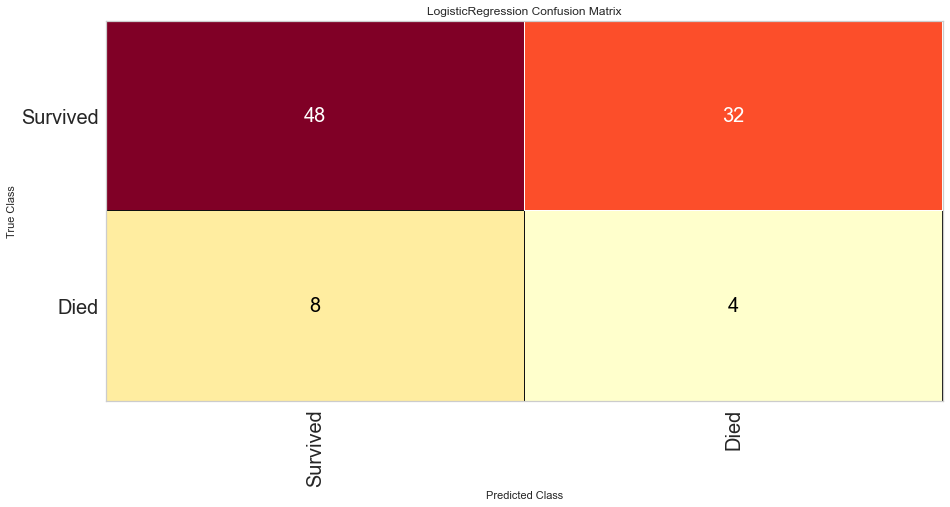

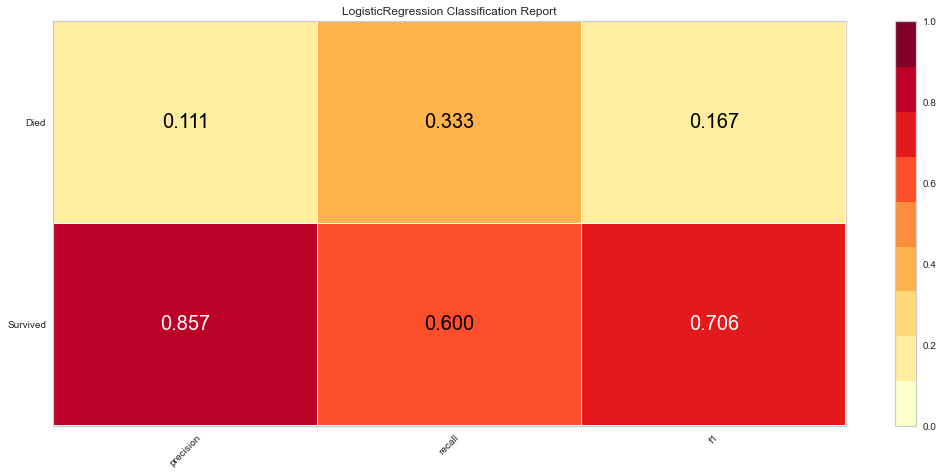

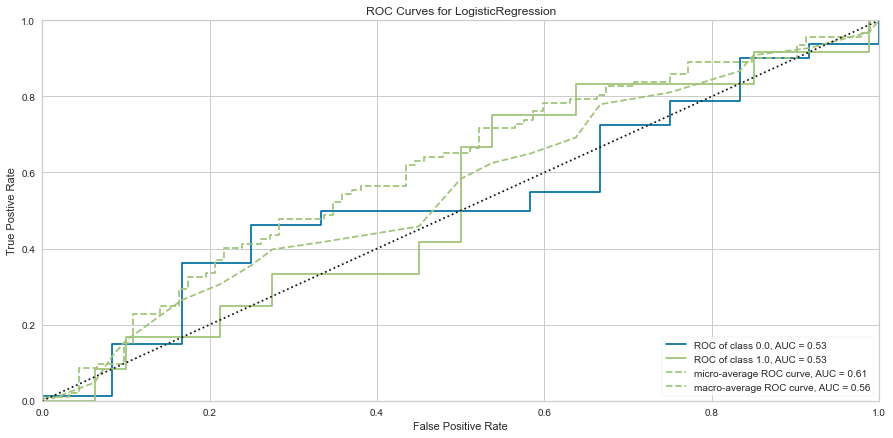

In [143]:
#Creating Features and Target Objects
features = df1.loc[:, df.columns != 'Target']
target = df1['Target']

#Getting Dummies for Our Categoricals
features = pd.get_dummies(features)

#Creating Standardizer and Logit Objects
standardizer = StandardScaler()
logit = LogisticRegression(class_weight = 'balanced')

#Standardizing Features
features_standardized = standardizer.fit_transform(features)

#Train/Test Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2)

#Fitting Data to Logistic Regression Classifier
logreg = logit.fit(features_train, target_train)

#Confusion Matrix Visualizer
classes = ['Survived', 'Died']
cm = ConfusionMatrix(logit, classes = classes, percent = False)

#Fitting Passed Model
cm.fit(features_train, target_train)
cm.score(features_test, target_test)

#Changing Fontsize in Figure
for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

#Configuring Graph Parameters
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(logit, classes = classes)
visualizer.fit(features_train, target_train)
visualizer.score(features_test, target_test)
g = visualizer.poof()

#ROC/AUC Curve

roc = ROCAUC(logit)
roc.fit(features_train, target_train)
roc.score(features_test, target_test)
g = roc.poof()

Removing the outliers resulted in lower F1 scores for both predicted classes as the ROC.

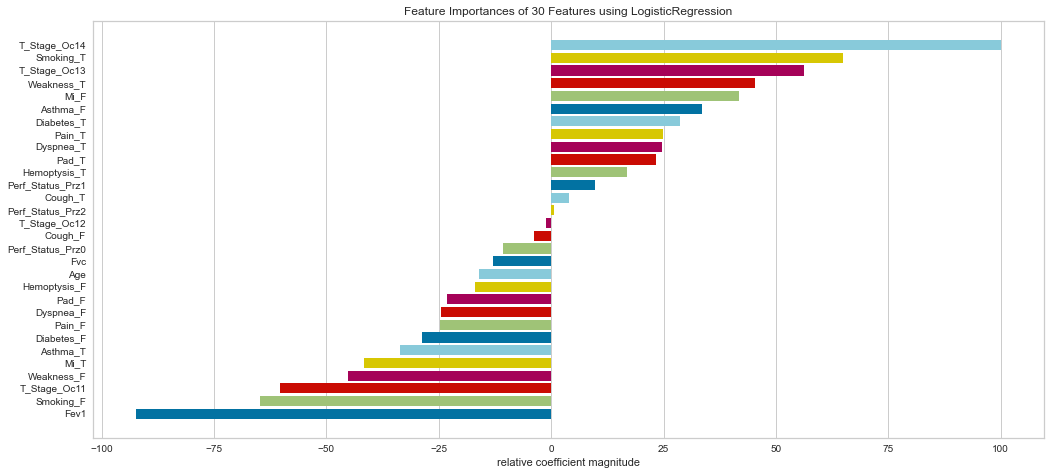

In [145]:
#Checking Feature Importance
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(logreg, labels = labels)
viz.fit(features_train, features_test)
viz.show()

The relative importance with the outliers removed found similar variables as relatively more important.

### Support Vector Machine Classifier

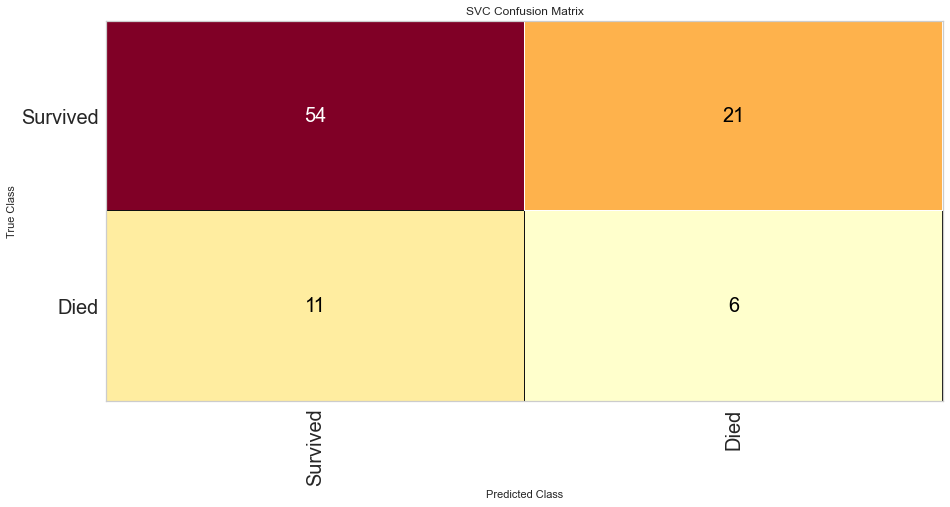

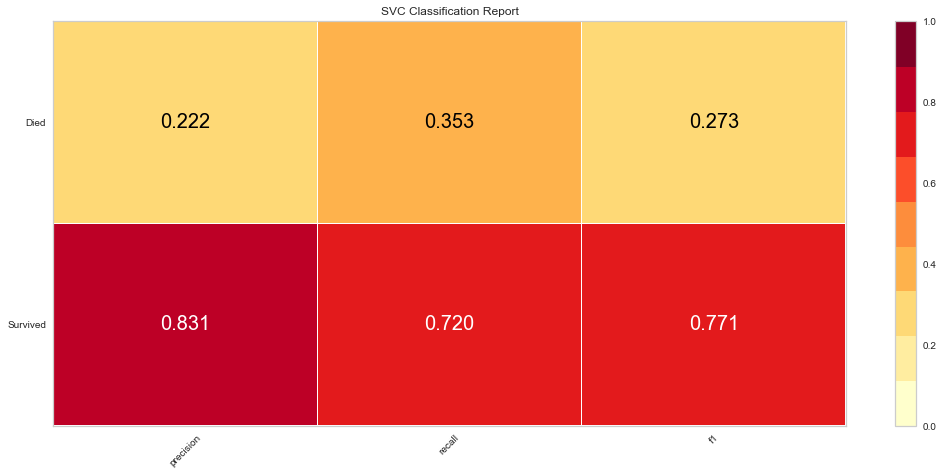

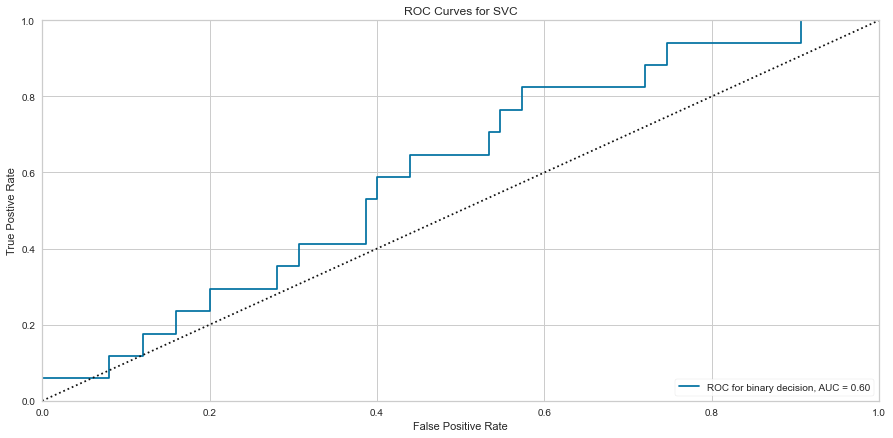

In [146]:
#Resetting our Target Object to Not Have Dummy Variables
target = df1['Target']

#Creating SVM Object
svc = SVC(kernel= 'linear', class_weight = 'balanced')

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 1)

svc.fit(features_train, target_train)

cm_svc = ConfusionMatrix(svc, classes = classes, percent = False)
cm_svc.fit(features_train, target_train)
cm_svc.score(features_test, target_test)
cm_svc.poof()

svc_vis = ClassificationReport(svc, classes = classes)
svc_vis.fit(features_train, target_train)
svc_vis.score(features_test, target_test)
svc_vis.poof()

svc_roc = ROCAUC(svc, micro = False, macro = False, per_class = False)
svc_roc.fit(features_train, target_train)
svc_roc.score(features_test, target_test)
svc_roc.poof()

This SVC model also performed worse with lower F1 scores for both classes as well as the ROC.

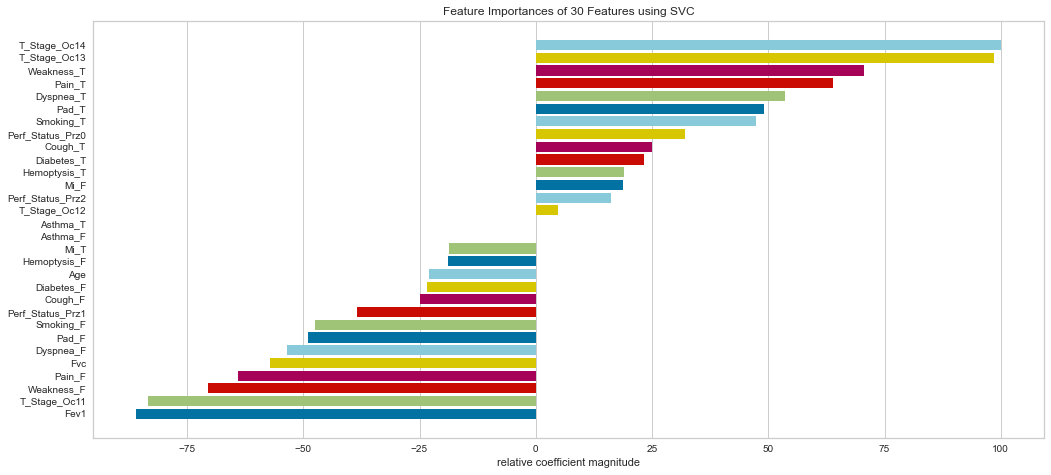

In [115]:
#Checking Feature Importance
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(svc, labels = labels)
viz.fit(features_train, features_test)
viz.show()

There were no significant changes in relative feature importance.

### KNN

In [148]:
#Getting Dummies for Target Variable
features = pd.get_dummies(features)
target = pd.get_dummies(df1['Target'])

#Standardizing Features

standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 1)

#Starting with KNN of 3
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
knn.fit(features_train, target_train)

#Visualizing Metrics
target_pred = knn.predict(features_test)
test = np.array(target_test).argmax(axis=1)
predictions = np.array(target_pred).argmax(axis=1)
print('Confusion Matrix:\n', confusion_matrix(test, predictions), '\n')
print('Classification Report:\n', classification_report(test, predictions), '\n')

Confusion Matrix:
 [[67  8]
 [16  1]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        75
           1       0.11      0.06      0.08        17

    accuracy                           0.74        92
   macro avg       0.46      0.48      0.46        92
weighted avg       0.68      0.74      0.71        92
 



In [149]:
#Running New Tuned Model and Evaluating Metrics
knn_best = KNeighborsClassifier(n_neighbors = 11, p = 1, leaf_size = 1, metric = "minkowski", weights= "uniform", n_jobs = -1)
knn_best.fit(features_train, target_train)
target_pred = knn_best.predict(features_test)
test = np.array(target_test).argmax(axis=1)
predictions = np.array(target_pred).argmax(axis=1)
print("Confusion Matrix:\n", confusion_matrix(test, predictions),'\n')
print("Classification Report:\n", classification_report(test, predictions))

Confusion Matrix:
 [[75  0]
 [17  0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        75
           1       0.00      0.00      0.00        17

    accuracy                           0.82        92
   macro avg       0.41      0.50      0.45        92
weighted avg       0.66      0.82      0.73        92



Removing the outliers here also resulted in worsened F1 scores for both predicted classes, even after hyperparameter tuning.

### XG Boost

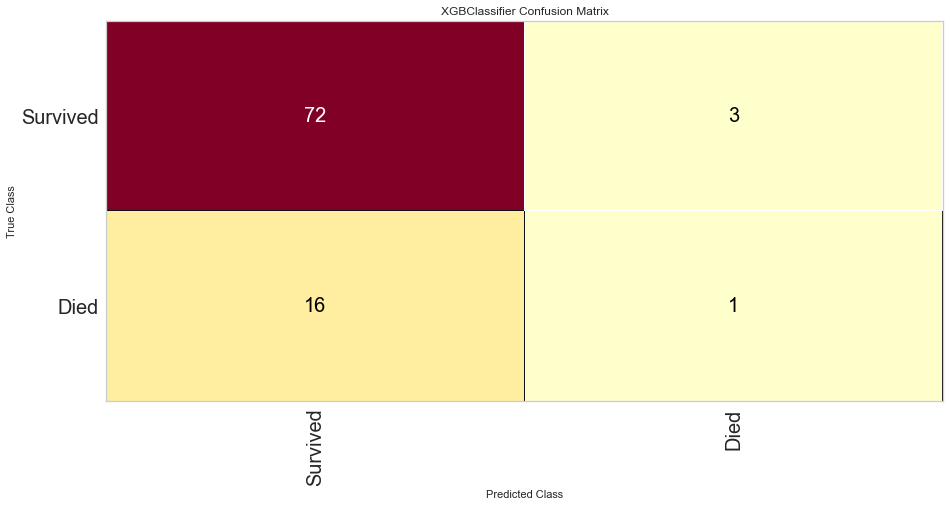

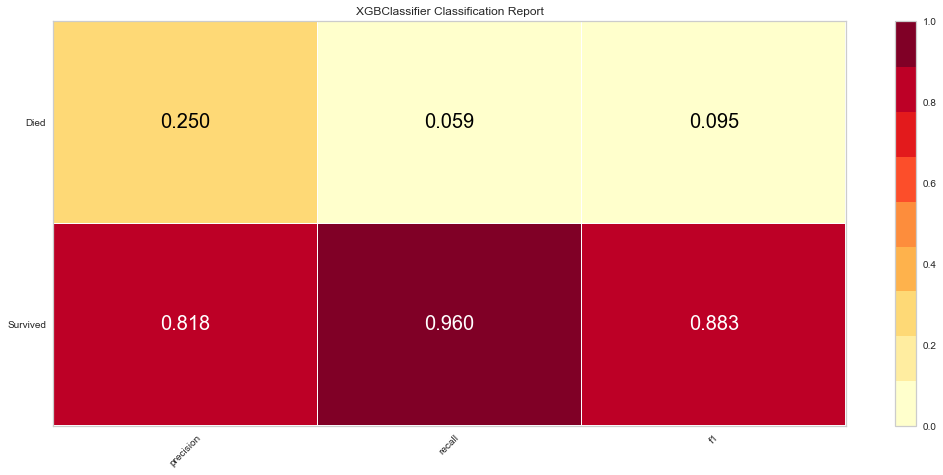

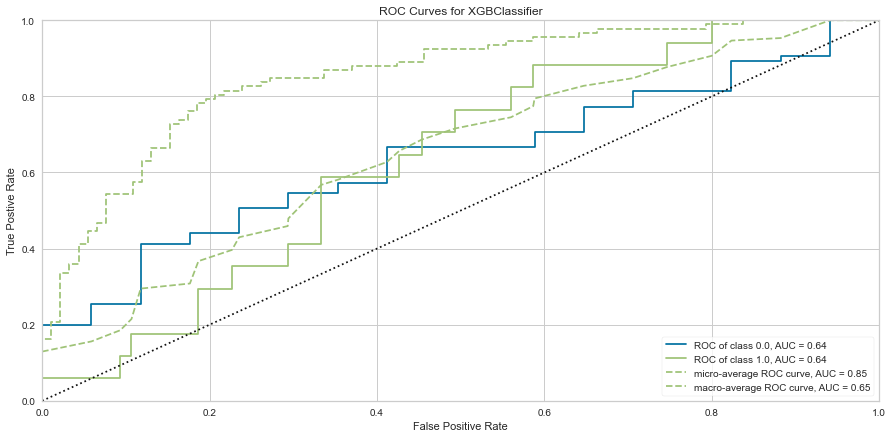

In [150]:
features = pd.get_dummies(features)
target = df1['Target']

#Train/Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 1)

xgb = XGBClassifier(random_state = 1)
xgb.fit(features_train, target_train)

#Visualizing Confusion Matrix, Class Report, and ROC Curve
xgb_cm = ConfusionMatrix(xgb, classes = classes, percent = False)
xgb_cm.fit(features_train, target_train)
xgb_cm.score(features_test, target_test)
xgb_cm.poof()

xgb_class = ClassificationReport(xgb, classes = classes)
xgb_class.fit(features_train, target_train)
xgb_class.score(features_test, target_test)
xgb_class.poof()

xgb_roc = ROCAUC(xgb)
xgb_roc.fit(features_train, target_train)
xgb_roc.score(features_test, target_test)
xgb_roc.poof()

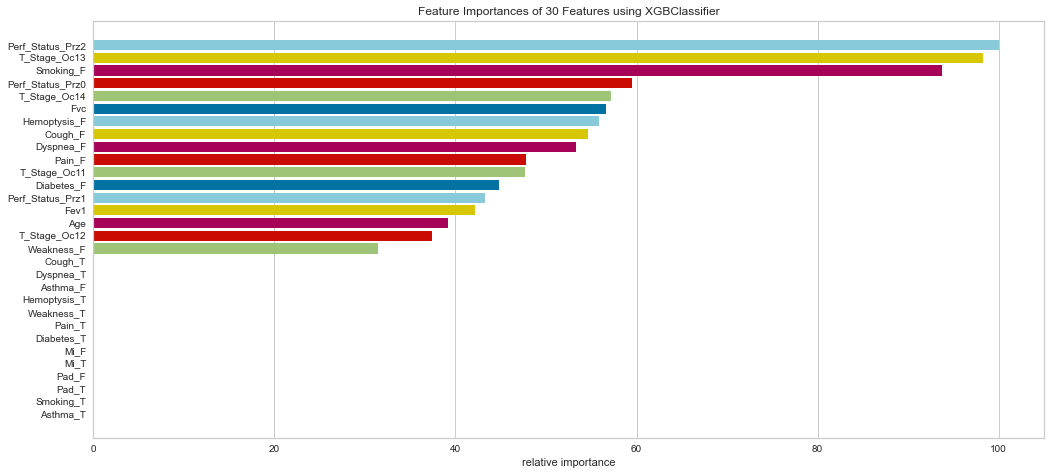

In [116]:
#Checking Feature Importance
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(xgb, labels = labels)
viz.fit(features_train, features_test)
viz.show()

Interestingly, the XG Boost algorithm, once the outliers were removed had a slightly decreased prediction of survival F1 score but did have a slightly better prediction score for predicting death.  The ROC was slightly higher for both classes as well.  The feature importances also changed slightly in that in this model, the worse performance status was relatively more important.  T3/4 tumor stage continued to be highly important as well.

## Conclusions

This dataset was challenging in a multitude of ways.  The file format was unusual and the variables and columns had to be renamed.  Further, for machine learning modelling, the target variable was switched to a numerical boolean for easier processing.

The main issue with this dataset is that this dataset had a significantly higher survived population than the died population.  With an imbalanced target class, the algorithms will usually predict the higher proportion class since it is more likely to be correct.  With class balancing, this did improve somewhat but all F1 scores for predicting death were lower than 0.3.

The purpose of this data is to develop an algorithm that would predict those at high risk of complications or death.  That way, there could be further interventions or intensification of care and monitoring to help prevent that outcome.  None of the machine learning models here performed very well with predicting what we want to predict.  Overall, the logistic regression did the best at prediction with the highest F1 scores for both predicted survival and death though it was poorly accurate at predicting death.  The point of the project is to identify high risk patients so that clinical care could be changed to help improve outcomes more favorably.

It is very interesting that many of the methods seemed to pick out the same variables that are medically well-known to correlate with survival, notably the performance status and T stage of the tumor.  This suggests that machine learning can pick up on logical data trends that are logically known, but the algorithm picked this out statistically without outside knowledge of the background of the problem.

We would require a much larger dataset and a much more varied patient population in order to have highly predictive algorithms.